In [1]:
# import splitfolders

# input = "D:\python\datasets\Plant_leave_diseases_dataset_without_augmentation"


# splitfolders.ratio(input, output="D:\python\datasets\Plant_leave_diseases_dataset_with_train_test_val_split",
#     seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) 

In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
import pandas as pd

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/train/",
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)


Found 1524 files belonging to 2 classes.


In [4]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "cdataset/test/",
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)

Found 192 files belonging to 2 classes.


In [5]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/val/",
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)

Found 190 files belonging to 2 classes.


In [6]:
folder_names = train_data.class_names
folder_names

['Cherry___Powdery_mildew', 'Cherry___healthy']

In [7]:
train_data, val_data, test_data 

(<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [8]:
print(r"train data: {}. \n test data: {}, \n val data: {}".format(len(train_data),len(test_data),len(val_data)))

train data: 48. \n test data: 6, \n val data: 6


In [9]:
# caching,shuffle and prefetching the data
train_ds = train_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
# Image Preprocessing : Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])


# Data augmentation by flipping and rotating existing images
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.5)
])


In [11]:
# Creating Convolution layer 
input_shape = (32, 256, 256, 3)#batch_size ,(image,image),channels
n_classes = 2  # n_Classes arg must be = to no. of folder 

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),# n_Classes arg must be = to no. of folder 

])

model.build(input_shape = input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [13]:
# Optimizing the model 'SparseCategoricalCrossentropy'=>as there are many categorical classes of data
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
    metrics = ['accuracy'])

In [14]:

#Fit the model with training ds and also pass validation ds
history = model.fit(
train_ds, epochs =20, batch_size = 32, verbose = 1, validation_data = val_ds)


Epoch 1/20
48/48 [==============================] - 85s 2s/step - loss: 0.3766 - accuracy: 0.8058 - val_loss: 0.1912 - val_accuracy: 0.9211
Epoch 2/20
48/48 [==============================] - 72s 1s/step - loss: 0.1815 - accuracy: 0.9278 - val_loss: 0.1408 - val_accuracy: 0.9579
Epoch 3/20
48/48 [==============================] - 108s 2s/step - loss: 0.1058 - accuracy: 0.9626 - val_loss: 0.0726 - val_accuracy: 0.9737
Epoch 4/20
48/48 [==============================] - 113s 2s/step - loss: 0.0948 - accuracy: 0.9672 - val_loss: 0.0485 - val_accuracy: 0.9895
Epoch 5/20
48/48 [==============================] - 100s 2s/step - loss: 0.0851 - accuracy: 0.9751 - val_loss: 0.0540 - val_accuracy: 0.9842
Epoch 6/20
48/48 [==============================] - 91s 2s/step - loss: 0.0959 - accuracy: 0.9665 - val_loss: 0.0455 - val_accuracy: 0.9895
Epoch 7/20
48/48 [==============================] - 86s 2s/step - loss: 0.0465 - accuracy: 0.9875 - val_loss: 0.0230 - val_accuracy: 0.9895
Epoch 8/20
48/48 

In [15]:
model.save("cherry_disease_model.h5")

In [26]:
model.save(filepath="cherry_models")

INFO:tensorflow:Assets written to: cherry_models\assets


INFO:tensorflow:Assets written to: cherry_models\assets


In [51]:
new_model = tf.keras.models.load_model("cherry_disease_model.h5")

In [52]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 48}

In [53]:
new_model.evaluate(train_data)

48/48 [==============================] - 13s 261ms/step - loss: 0.0160 - accuracy: 0.9967


[0.01597129926085472, 0.9967191815376282]

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
history.history['accuracy']

[0.8057742714881897,
 0.9278215169906616,
 0.962598443031311,
 0.9671915769577026,
 0.9750655889511108,
 0.9665354490280151,
 0.9875327944755554,
 0.9914698004722595,
 0.9927821755409241,
 0.9934383034706116,
 0.9796587824821472,
 0.9895012974739075,
 0.9901574850082397,
 0.9973753094673157,
 0.9881889820098877,
 0.9921259880065918,
 0.9973753094673157,
 0.9809711575508118,
 0.9901574850082397,
 0.9973753094673157]

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

In [57]:
max(acc),max(val_acc),max(loss),max(val_loss)

(0.9973753094673157, 1.0, 0.37661832571029663, 0.19124937057495117)

Text(0.5, 1.0, 'training and validation accuracy')

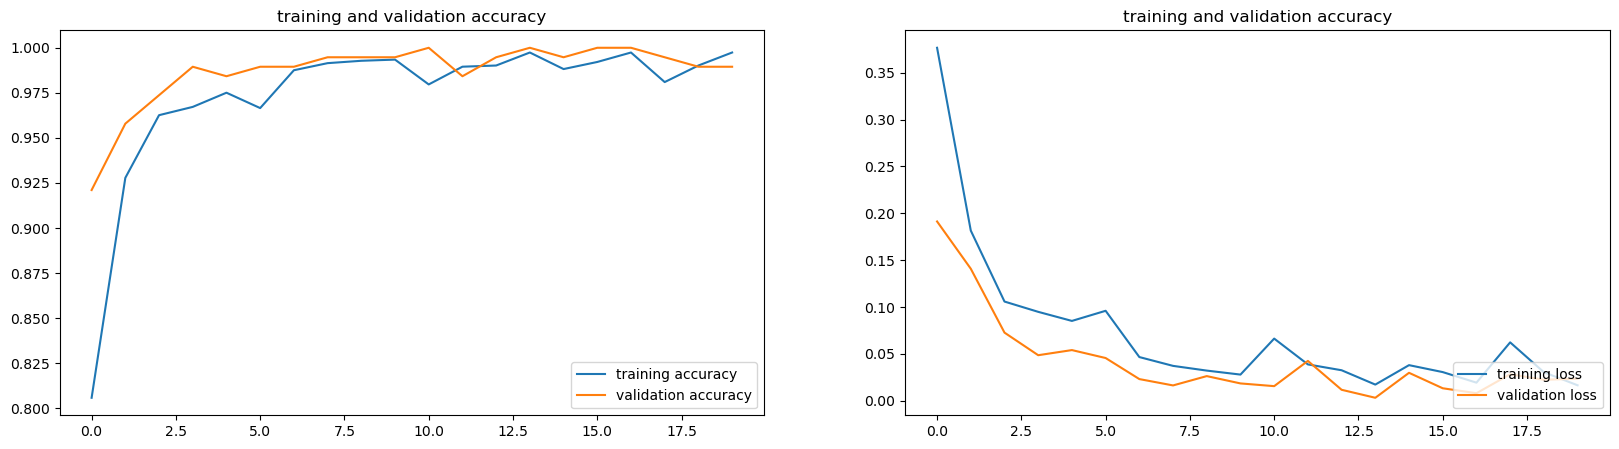

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(history.params['epochs']),acc,label="training accuracy")
plt.plot(range(history.params['epochs']),val_acc,label="validation accuracy")
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(history.params['epochs']),loss,label="training loss")
plt.plot(range(history.params['epochs']),val_loss,label="validation loss")
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

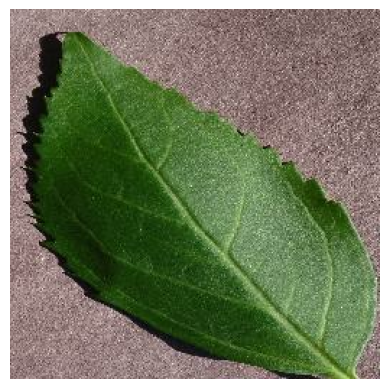

In [70]:
# # to show the image of the leaf
# for image, label in test_ds.take(1):
#     plt.axis('off')
#     plt.imshow(image[0].numpy().astype('uint8'))

In [75]:
# a = [8.529313e-06 , 9.999914e-01]
# max(a)

1

first image
actual label: Cherry___Powdery_mildew
1/1 [==============================] - 0s 418ms/step
[9.999924e-01 7.649689e-06]
predicted image: Cherry___Powdery_mildew


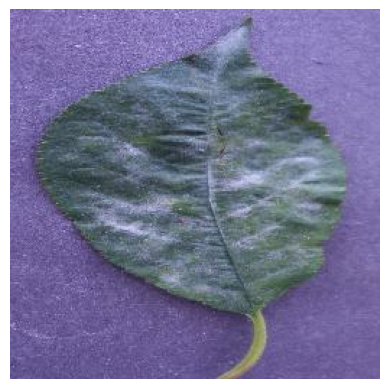

In [76]:
for image, label in test_ds.take(1):
    first_image = (image[0].numpy().astype('uint8')) # 0 means the first image u can write 1 and 2 to get send and third image
    first_label = label[0]

    print("first image")
    plt.axis("off")

    plt.imshow(first_image)
    print("actual label:",folder_names[first_label])

    batch_prediction = model.predict(image) # prediction ofr 32 image as it is a batch size
    print(batch_prediction[0],end="\n")
    print("predicted image:",folder_names[np.argmax(batch_prediction[0])])


In [92]:
def predict(model,img):   
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img_array,0)

    prediction = model.predict(img_array)

    predicted_class = folder_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)

    return predicted_class, confidence

1/1 [==============================] - 0s 57ms/step


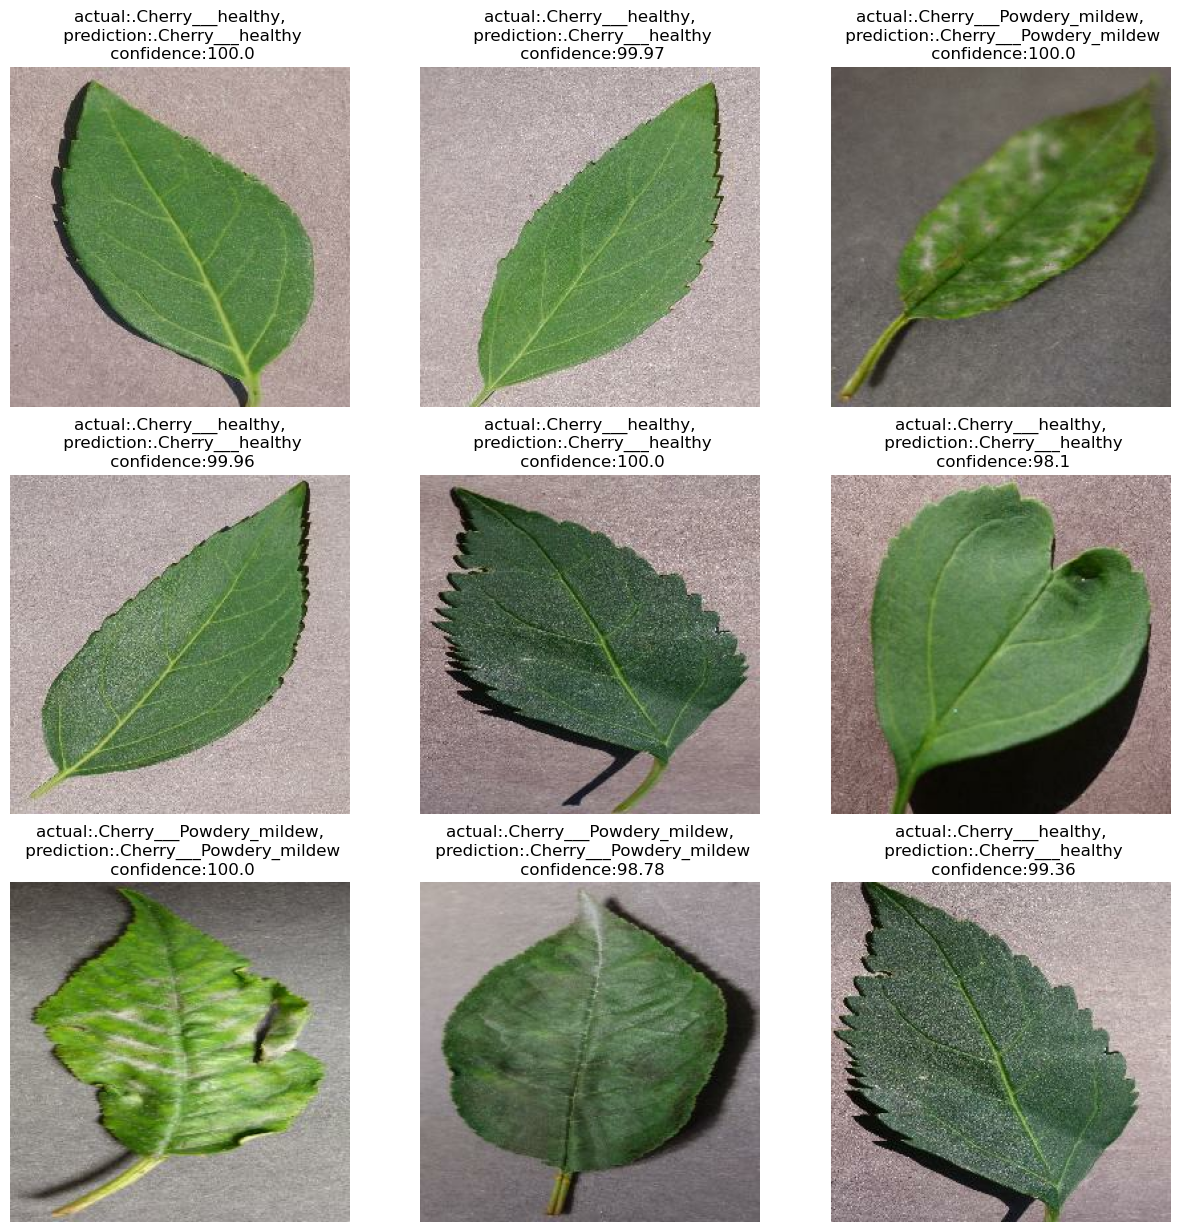

In [96]:
plt.figure(figsize=(15,15))

for image,label in test_ds.take(1):# taking batch one of image 32 
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))

        predicted_class,confidence = predict(model,image[i])
        actual_class = folder_names[label[i]]

        plt.title(f"actual:.{actual_class},\n prediction:.{predicted_class}\n confidence:{confidence}")


        plt.axis('off')


